In [11]:
from enum import Enum
from random import randint
import time
import heapq

class Ordering(Enum):
    Unsorted = 1
    Sorted = 2
    RevSorted = 3

def benchmark(algorithm, list):
    start_time = time.perf_counter()
    algorithm(list)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

def generate_list(ordering, length):
    l = [None] * length
    match ordering:
        case Ordering.Unsorted:
            for i in range(length):
                l[i] = randint(0, length*10)
        case Ordering.Sorted:
            for i in range(length):
                l[i] = i
        case Ordering.RevSorted:
            for i in range(length):
                l[i] = (length - i - 1)
    return l

def heappush_benchmark(heap):
    heapq.heapify(heap)
    element = randint(0, len(heap)*10)
    heapq.heappush(heap, element)

def heappop_benchmark(heap):
    heapq.heapify(heap)
    heapq.heappop(heap)

list_sizes = [100, 1000, 2500, 10000, 20000, 30000, 50000, 100000, 1000000, 10000000]

for size in list_sizes:
    print(f"List size: {size}")
    for ordering in Ordering:
        print(f"Ordering: {ordering.name}")
        lst = generate_list(ordering, size)
        print("Heappush time:", benchmark(heappush_benchmark, lst.copy()))
        print("Heappop time:", benchmark(heappop_benchmark, lst.copy()))
        print()

List size: 100
Ordering: Unsorted
Heappush time: 2.1600164473056793e-05
Heappop time: 6.6999346017837524e-06

Ordering: Sorted
Heappush time: 5.100155249238014e-06
Heappop time: 2.8999056667089462e-06

Ordering: RevSorted
Heappush time: 3.200024366378784e-06
Heappop time: 2.00001522898674e-06

List size: 1000
Ordering: Unsorted
Heappush time: 3.2800016924738884e-05
Heappop time: 2.6999972760677338e-05

Ordering: Sorted
Heappush time: 2.110004425048828e-05
Heappop time: 1.8399907276034355e-05

Ordering: RevSorted
Heappush time: 1.910002902150154e-05
Heappop time: 1.5300000086426735e-05

List size: 2500
Ordering: Unsorted
Heappush time: 7.500010542571545e-05
Heappop time: 6.790016777813435e-05

Ordering: Sorted
Heappush time: 5.070003680884838e-05
Heappop time: 5.189981311559677e-05

Ordering: RevSorted
Heappush time: 3.9499951526522636e-05
Heappop time: 3.7300167605280876e-05

List size: 10000
Ordering: Unsorted
Heappush time: 0.00027379998937249184
Heappop time: 0.0004102000966668129



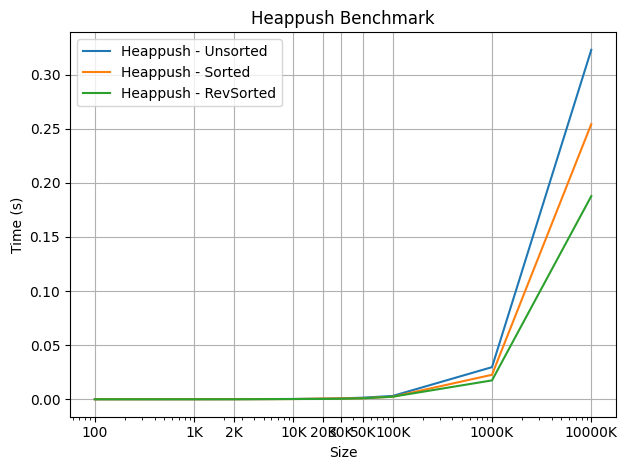

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Existing code ...

for ordering in Ordering:
    heappush_times = []
    for size in list_sizes:
        lst = generate_list(ordering, size)
        heappush_time = benchmark(heappush_benchmark, lst.copy())
        heappush_times.append(heappush_time)

    
    # Plotting
    plt.plot(list_sizes, heappush_times, label=f"Heappush - {ordering.name}")

plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.title('Heappush Benchmark')
plt.legend()
plt.grid(True)
plt.xscale('log')  
plt.xticks(list_sizes, [f"{size // 1000}K" if size >= 1000 else size for size in list_sizes])
plt.tight_layout()
plt.show()


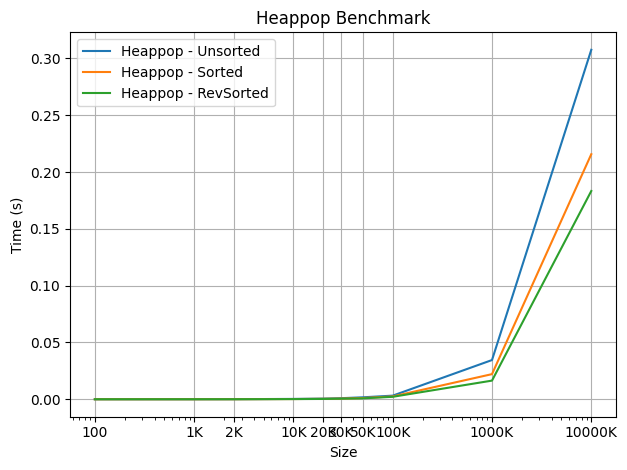

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Existing code ...

for ordering in Ordering:
    heappop_times = []
    for size in list_sizes:
        lst = generate_list(ordering, size)
        heappop_time = benchmark(heappop_benchmark, lst.copy())
        heappop_times.append(heappop_time)
    
    # Plotting
    plt.plot(list_sizes, heappop_times, label=f"Heappop - {ordering.name}")

plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.title('Heappop Benchmark')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Use log scale for better visualization of large sizes
plt.xticks(list_sizes, [f"{size // 1000}K" if size >= 1000 else size for size in list_sizes])

# plt.xticks(list_sizes, [str(size) for size in list_sizes])  # Set x ticks to list sizes
plt.tight_layout()
plt.show()
